$\Large u=\ln \left( \frac{v}{\langle v \rangle} \right)$

$\Large C(\tau) = \frac{\langle \left[u(t)-\langle u(t) \rangle \right] \left[ u(t+\tau)-\langle u(t) \rangle \right] \rangle}{\langle \left[ u(t)-\langle u(t) \rangle \right]^{2} \rangle }$

# INDEX

    1. Autocorrelation Original Data
        1.1. Plot and fit
        
    2. Autocorrelation Interpolated Data
        2.1. Plot and fit
        
    3. Comparing original and interpolated data
    
    4. Individual Autocorrelation
        
        

# 1. Autocorrelation Original Data

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


all_files = glob.glob(os.path.join("*.csv")) #make list of paths


corr_mean_s=[]
for s in range(1,600):   
    corr_mean_n=[]
    print(s)
    for file in all_files: 
        df = pd.read_csv(file)      
       
        v=df['v'][:-1].tolist()
        mean_v=sum(v)/len(v)
        u=[]
        for i in range(len(v)):
            v_log=np.log(v[i]/mean_v)
            u.append(v_log)
            
           
        if len(u) > s:
            mean=sum(u)/len(u)
            variance = sum([((y - mean) ** 2) for y in u]) / len(u)
            std= variance ** 0.5  

            delta_r_i_rescaled = [(x - mean)/std for x in u]
            
            res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
            average_corr=sum(res)/len(res)    
            corr_mean_n.append(average_corr)
            
    
    corr_mean_n2=sum(corr_mean_n)/len(corr_mean_n)
    corr_mean_s.append(corr_mean_n2)

autocorr=np.array(corr_mean_s)



#np.savetxt('autocorrelation_log.txt', autocorr)





## 1.1. Plot and fit

$C(\tau)=A e^{-a\tau} + B e^{-b\tau} + C$


<ipython-input-4-62b6a7782ec9>:14: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-4-62b6a7782ec9>:57: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-62b6a7782ec9>:58: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-4-62b6a7782ec9>:59: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(0,200)


t high: 11.72920438026236 +- 1.3931702039321108
t low: 2.1266180331106086 +- 0.18872906502817677


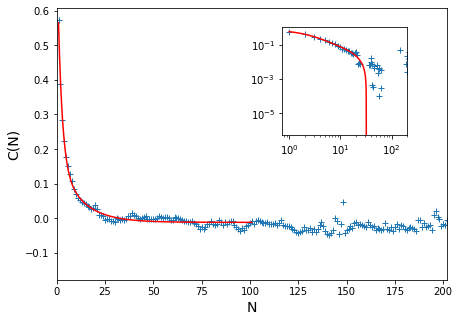

In [4]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


# Double exponential
def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C


f=open('autocorrelation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)



fig, ax1 = pp.subplots(figsize=(7,5))  


#FIT
popt, pcov = curve_fit(expDouble, tau[:100], autocorr_vel[:100], p0=(1,1,1,1,1))    #Fit high values of tau>8
times = np.arange(tau[0], tau[100], 0.001)
model = expDouble(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

 

ax1.plot(tau, autocorr_vel, '+', label='ordered') 
ax1.plot(times, model, '-r',label='fit')
ax1.set_ylabel(r'C(N)',fontsize=14)
ax1.set_xlabel(r'N',fontsize=14)
ax1.set_xlim(0,202)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.51,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '+', label='data')
axins2.plot(times, model, '-r',label='fit')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,200)


print('t high:', 1./popt[0], '+-', perr[0]/(popt[0]**2))
print('t low:', 1./popt[2], '+-', perr[2]/(popt[2]**2))

pp.show()



# 2. Autocorrelation Interpolated Data

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths
.
corr_mean_s=[]
for s in range(1,600):   
    corr_mean_n=[]
    print(s)
    for file in all_files: 
        df = pd.read_csv(file)   
        df2=df.copy() 

        if 'index' in df2:   # if the file has the column index, delete it
            del df2['index']

        df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
        df2.index = df2['time']  # Then convert the column time into index
        
        del df2['time']  # delete column time
        del df2['nickname']
        del df2['At']
        del df2['d']
        del df2['v']

        # Resample time index every second and interpolate
        df2=df2.resample('1S').asfreq().interpolate()
        df2.reset_index(level=0, inplace=True)

    # We calculate the time difference and the distance every "s" points (timesteps). So if s=1 we obtain the At/dist/vel. every
    # timestep (i.e. consecutive). If s=2, we calculate the differece between points separated 2 steps (t2-t0, t3-t1,...) and so
        At=[]
        distance=[]
        for i in range(1,len(df2['time'])):
            At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
            dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
            distance.append(dist)

        At.insert(len(At), np.nan)
        distance.insert(len(distance), np.nan)

        df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
        df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
        df2['v']=df2['d']/df2['At']

        delta_r_i=df2['d'][:-1].tolist()
        
        v=df2['v'][:-1].tolist()
        mean_v=sum(v)/len(v)
        u=[]
        for i in range(len(v)):
            v_log=np.log(v[i]/mean_v)
            u.append(v_log)
            
        
        if len(u) > s:
            mean=sum(u)/len(u)
            variance = sum([((y - mean) ** 2) for y in u]) / len(u)
            std= variance ** 0.5  

            delta_r_i_rescaled = [(x - mean)/std for x in u]
            
            res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
            average_corr=sum(res)/len(res)    
            corr_mean_n.append(average_corr)
            
    
    corr_mean_n2=sum(corr_mean_n)/len(corr_mean_n)
    corr_mean_s.append(corr_mean_n2)

autocorr=np.array(corr_mean_s)


#np.savetxt('autocorrelation_interpolation_log.txt', autocorr)





## 2.1. Plot and fit

$C(\tau)=A e^{-a\tau} + B e^{-b\tau} + C$

<ipython-input-7-a510d310b758>:13: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-7-a510d310b758>:54: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-7-a510d310b758>:55: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-7-a510d310b758>:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(0,200)


t low: 21.91995647630589 +- 2.039719492980412
t high: 3.2977955786996667 +- 0.14564896059241692


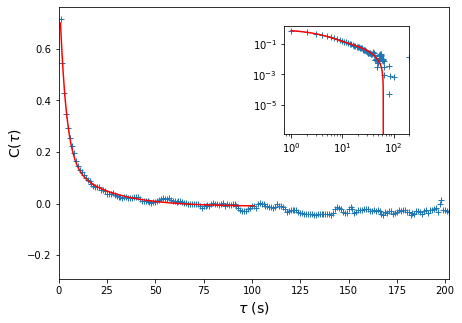

In [7]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C


f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)



fig, ax1 = pp.subplots(figsize=(7,5))  


#FIT
popt, pcov = curve_fit(expDouble, tau[:100], autocorr_vel[:100], p0=(1,1,1,1,1))    #Fit high values of tau>8
times = np.arange(tau[0], tau[100], 0.001)
model = expDouble(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

ax1.plot(tau, autocorr_vel, '+', label='ordered') 
ax1.plot(times, model, '-r',label='fit')
ax1.set_ylabel(r'C($\tau$)',fontsize=14)
ax1.set_xlabel(r'$\tau$ (s)',fontsize=14)
ax1.set_xlim(0,202)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.51,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '+', label='data')
axins2.plot(times, model, '-r',label='fit')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,200)

print('t low:', 1./popt[0], '+-', perr[0]/(popt[0]**2))
print('t high:', 1./popt[2], '+-', perr[2]/(popt[2]**2))

pp.show()



# 3. Comparing original and interpolated data

<ipython-input-11-f98dbc59686c>:29: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C
<ipython-input-11-f98dbc59686c>:91: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-11-f98dbc59686c>:92: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-11-f98dbc59686c>:93: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(0,200)



C(x) = A·exp(-a·x1) + B·exp(-b·x2) + C

A= 0.15821584921301166 +- 0.028268815012381862
B= 0.7468556957310525 +- 0.04746168319683179
C= -0.02386594960094052 +- 0.0015229640532385107

t low, a: 32.52247799286519 +- 5.629434303551239
t high, b: 3.609802381686694 +- 0.4316939794091768

A+B+C= 0.8812055953431236


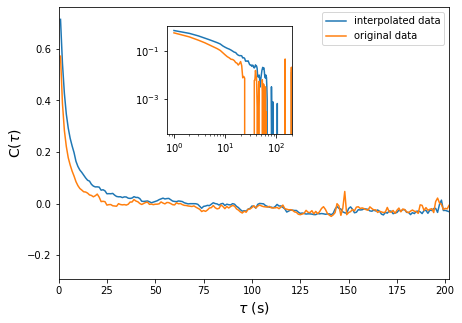

Original Data

t low: 11.72920438026236 +- 1.3931702039321108
t high: 2.1266180331106086 +- 0.18872906502817677


Interpolated Data

t low: 21.91995647630589 +- 2.039719492980412
t high: 3.2977955786996667 +- 0.14564896059241692


In [11]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


def expOU(x,a,b):
    return ((np.exp(4*b*np.exp(-a*x)))-1)/((3*np.exp(4*b))-1)   #EXPONENTIAL OU, AUTOCORRELATION FUNCTION 

def expOUlow(x,c,k2,b):
    return (c/(3*np.exp(4*b)-1.))*(np.exp(4*b-2*k2*x)-1)  #APPROXIMATION LOW VALUES OF TAU

def expOUhigh(x,c,a,b):
    return c*(4*b*np.exp(-a*x))/((3*np.exp(4*b))-1)  #APPROXIMATION HIGHT VALUES OF TAU


def explow(x,a,b,alfa1):     #EXPONENTIAL FUNCTION 
    return a*np.exp(-alfa1*x)+b

def exphigh(x,a,alfa2):     #EXPONENTIAL FUNCTION 
    return a*np.exp(-alfa2*x)

def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C


f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

f_original=open('autocorrelation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines_original=f_original.readlines()
data_original=[]
for x_original in lines_original:
    data_original.append(x_original.split('\n')[0])
f_original.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
data2_original=[]
for j_original in data_original:
    data2_original.append(float(j_original))  #list of autocorrelations
    
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)
autocorr_vel_original=np.array(data2_original)



fig, ax1 = pp.subplots(figsize=(7,5))  


#FIT. CREEM LA CORVA D'AJUST.  
#Popt ens dona el parametre optimitzat i la diagoal de pcov l'error
popt, pcov = curve_fit(expDouble, tau[:100], autocorr_vel[:100], p0=(1,1,1,1,1))  #Fit low values of tau<8
times = np.arange(tau[0], tau[100], 0.001)
model = expDouble(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(expDouble, tau[:100], autocorr_vel_original[:100], p0=(1,1,1,1,1))    #Fit high values of tau>8
times2 = np.arange(tau[0], tau[100], 0.001)
model2 = expDouble(times2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))  #calcul error del parametre


ax1.plot(tau, autocorr_vel, '-', label='interpolated data')
ax1.plot(tau, autocorr_vel_original, '-', label='original data') 
ax1.set_ylabel(r'C($\tau$)',fontsize=14)
ax1.set_xlabel(r'$\tau$ (s)',fontsize=14)
ax1.set_xlim(0,202)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.21,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '-', label='interpolated data')
axins2.plot(tau, autocorr_vel_original, '-', label='original data')
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,200)

ax1.legend()

print('')
print('C(x) = A·exp(-a·x1) + B·exp(-b·x2) + C')
print('')
print('A=',popt3[1],'+-', perr3[1])
print('B=',popt3[3], '+-',perr3[3])
print('C=',popt3[4],'+-',perr3[4])
print('')
print('t low, a:', 1./popt3[0], '+-', perr3[0]/(popt3[0]**2))
print('t high, b:', 1./popt3[2], '+-', perr3[2]/(popt3[2]**2))
print('')
print('A+B+C=', popt3[1]+popt3[3]+popt3[4])
pp.show()


print('Original Data')
print('')
print('t low:', 1./popt2[0], '+-', perr2[0]/(popt2[0]**2))
print('t high:', 1./popt2[2], '+-', perr2[2]/(popt2[2]**2))

print('')
print('')

print('Interpolated Data')
print('')
print('t low:', 1./popt[0], '+-', perr[0]/(popt[0]**2))
print('t high:', 1./popt[2], '+-', perr[2]/(popt[2]**2))

# 4. Individual Autocorrelation

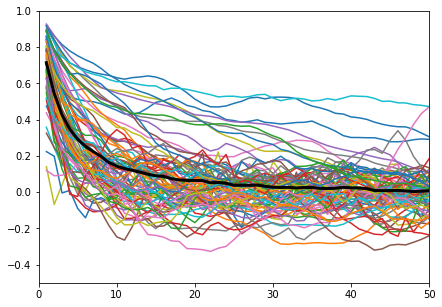

In [17]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths
fig, ax1 = pp.subplots(figsize=(7,5))

for file in all_files:
    
    df = pd.read_csv(file)   
    df2=df.copy() 
    
    if 'index' in df2:   # if the file has the column index, delete it
        del df2['index']

    df2['time'] = pd.to_datetime(df2['time'])   # Time to datetime format
    df2.index = df2['time']  # Then convert the column time into index

    del df2['time']  # delete column time
    del df2['nickname']
    del df2['At']
    del df2['d']
    del df2['v']

    # Resample time index every second and interpolate
    df2=df2.resample('1S').asfreq().interpolate()
    df2.reset_index(level=0, inplace=True)    
    
    At=[]
    distance=[]
    for i in range(1,len(df2['time'])):
        At.append((df2['time'][i]-df2['time'][i-1]).total_seconds())
        dist=getDistanceFromLatLonInM(df2['latitude'][i-1],df2['longitude'][i-1],df2['latitude'][i],df2['longitude'][i])
        distance.append(dist)

    At.insert(len(At), np.nan)
    distance.insert(len(distance), np.nan)

    df2['At']=At                # Insert the columns into the dataframe, calculate v (same as d if At=1s.)
    df2['d']=distance           # Then get a list of non NaN velocities, and obtain the mean value and the pdf for each s
    df2['v']=df2['d']/df2['At']

    delta_r_i=df2['d'][:-1].tolist()

    v=df2['v'][:-1].tolist()
    mean_v=sum(v)/len(v)
    u=[]
    for i in range(len(v)):
        v_log=np.log(v[i]/mean_v)
        u.append(v_log)
    
    
    corr_mean_n=[]
    ss=[]
    for s in range(1,len(u)):
        mean=sum(u)/len(u)
        variance = sum([((y - mean) ** 2) for y in u]) / len(u)
        std= variance ** 0.5  

        delta_r_i_rescaled = [(x - mean)/std for x in u]

        res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
        average_corr=sum(res)/len(res)    
        corr_mean_n.append(average_corr)
        ss.append(s)
    
    ax1.plot(ss, corr_mean_n, '-')
    
    
    
f=open('autocorrelation_interpolation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s=[]
for i in range(1,600):  #list of tau=1,2,...,100
    list_s.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
tau=np.array(list_s)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)
ax1.plot(tau, autocorr_vel, '-', color ='black', linewidth=3) 
ax1.set_xlim(0,50)
ax1.set_ylim(-0.5,1)

pp.show()
